In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

In [2]:
# import ostreo abunda
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)
f.keys()

[u'#refs#',
 u'DATA',
 u'O',
 u'S',
 u'SS',
 u'Smod',
 u'T',
 u'TT',
 u'c',
 u'chla',
 u'depths',
 u'lat',
 u'lats',
 u'lon',
 u'lons',
 u'm',
 u'model',
 u'ostreo',
 u'salt',
 u'sigt',
 u'temp',
 u'theta',
 u'turbid',
 u'z']

In [3]:
# import the optimally interpolated salinity data
cfname = '/Volumes/sclayton/kuroshio/cruise_data/D3MAPS1.mat'
g = sio.loadmat(cfname)
g.keys()

['loni',
 'salti',
 'zi',
 'vi',
 'tempi',
 '__header__',
 '__globals__',
 'DEPTH',
 'sigmi',
 'pressi',
 'ui',
 '__version__',
 'lati']

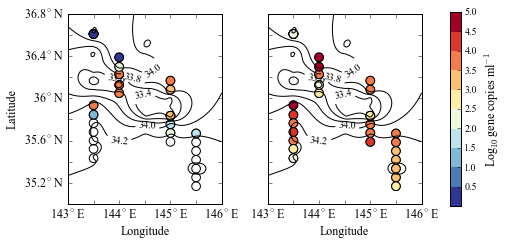

In [42]:
# make a plot of the data
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

fig3 = plt.figure(1, figsize=(6.3,3.5), dpi = 600)
palette = plt.get_cmap('RdYlBu_r',10)

plt.subplot(1,2, 1)

cs = plt.contour(g['loni'],g['lati'],g['salti'][0,:,:],[33.4, 33.6, 33.8, 34, 34.2, 34.4],colors ='k')
plt.clabel(cs, inline=1, fontsize=10, fmt='%3.1f') 
plt.scatter(f['lon'],f['lat'],s=75, facecolors='none', edgecolors='k')
plt.scatter(f['lon'],f['lat'],s=75,c=np.log10(f['O'][0,:]), vmin=0.01, vmax=5, cmap=palette)
plt.xlim([143, 146])
plt.ylim([35, 36.8])
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xticks(np.arange(143, 146.5, 0.5),[r'143$^{\circ}$E','',r'144$^{\circ}$E','',r'145$^{\circ}$E','',r'146$^{\circ}$E'])
plt.yticks(np.arange(35, 37, 0.2),['',r'35.2$^{\circ}$N','',r'35.6$^{\circ}$N','',r'36$^{\circ}$N','',r'36.4$^{\circ}$N', '', r'36.8$^{\circ}$N'])
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(1,2, 2)
cs = plt.contour(g['loni'],g['lati'],g['salti'][0,:,:],[33.4, 33.6, 33.8, 34, 34.2, 34.4],colors ='k')
plt.clabel(cs, inline=1, fontsize=10, fmt='%3.1f') 
plt.scatter(f['lon'],f['lat'],s=75, facecolors='none', edgecolors='k')
im = plt.scatter(f['lon'],f['lat'],s=75,c=np.log10(f['O'][1,:]), vmin=0.01, vmax=5,cmap=palette, alpha=1.)
plt.xlim([143, 146])
plt.ylim([35, 36.8])
plt.xlabel('Longitude', fontsize=12)
plt.xticks(np.arange(143, 146.5, 0.5),[r'143$^{\circ}$E','',r'144$^{\circ}$E','',r'145$^{\circ}$E','',r'146$^{\circ}$E'])
#plt.yticks(np.arange(35, 37, 0.2),['',r'35.2$^{\circ}$N','',r'35.6$^{\circ}$N','',r'36$^{\circ}$N','',r'36.4$^{\circ}$N', '', r'36.8$^{\circ}$N'])
plt.yticks(np.arange(35, 37, 0.2),['','','','','','','','','',''])
plt.tick_params(axis='both', which='major', labelsize=12)

fig3.subplots_adjust(right=1)
cbar_ax = fig3.add_axes([1, 0.17, 0.025, 0.77])
cb = fig3.colorbar(im, cbar_ax)
cb.set_label(label=r'Log$_{10}$ gene copies ml$^{-1}$',fontsize=12)

fig3.savefig('/Users/sclayton/Desktop/LO_fig3.tiff', format='tiff', dpi=600, bbox_inches = "tight")